# Датасет: US Consumer Finance Complaints
https://www.kaggle.com/datasets/kaggle/us-consumer-finance-complaints

In [298]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

# Читаем только первые 5,000 строк
df = pd.read_csv(filename, nrows=5000)


Saving consumer_complaints.csv to consumer_complaints (1).csv


In [299]:
correct_column_name = 'product'

selected_products = [
    'Credit reporting', 'Debt collection', 'Mortgage',
    'Credit card', 'Bank account or service'
]

filtered_df = df[df[correct_column_name].isin(selected_products)].copy()
print(f"Отфильтровано строк: {len(filtered_df)} из {len(df)}")

Отфильтровано строк: 4654 из 5000


In [300]:
# Обрабатываем столбец issue
filtered_df['issue_clean'] = filtered_df['issue'].fillna('').astype(str)

In [301]:
filtered_df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id', 'issue_clean'],
      dtype='object')

### **Задача**: Многоклассовая классификация текстовых жалоб потребителей на финансовые продукты/услуги

### **Цель**: Разработать модель машинного обучения, которая автоматически определяет категорию финансового продукта на основе текстового описания жалобы потребителя.

In [302]:
df.shape

(5000, 18)

In [303]:
filtered_df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,issue_clean
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,"Loan modification,collection,foreclosure"
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,"Loan servicing, payments, escrow account"
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,Incorrect information on credit report
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,False statements or representation
5,08/30/2013,Credit card,NaN,Application processing delay,NaN,NaN,NaN,Capital One,NY,12206,NaN,NaN,Phone,09/03/2013,Closed with explanation,Yes,Yes,510098,Application processing delay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10/31/2013,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,NaN,Discover,FL,33173,NaN,NaN,Web,10/31/2013,Closed with explanation,Yes,No,579329,Identity theft / Fraud / Embezzlement
4996,10/24/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Nationstar Mortgage,IL,60614,NaN,NaN,Web,10/23/2013,Closed with explanation,Yes,Yes,571304,"Loan servicing, payments, escrow account"
4997,10/02/2013,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,Wells Fargo & Company,FL,33487,NaN,NaN,Web,10/03/2013,Closed with explanation,Yes,No,550708,"Application, originator, mortgage broker"
4998,10/15/2013,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,"Aspire Financial, Inc.",TX,75115,Older American,NaN,Web,11/15/2013,Closed with monetary relief,Yes,No,559389,"Application, originator, mortgage broker"


# Анализ

0: '**date_received**' - Дата получения жалобы

1: '**product**' - Продукт/Услуга

2: '**sub_product**' - Подкатегория продукта

3: '**issue**' - Проблема/Вопрос

4: '**sub_issue**' - Подкатегория проблемы

5: '**consumer_complaint_narrative**' - Описание жалобы потребителя

6: '**company_public_response**' - Публичный ответ компании

7: '**company**' - Компания

8: '**state**' - Штат

9: '**zipcode**' - Почтовый индекс

10: '**tags**' - Метки/Теги

11: '**consumer_consent_provided**' - Согласие потребителя предоставлено

12: '**submitted_via**' - Способ подачи жалобы

13: '**date_sent_to_company**' - Дата отправки компании

14: '**company_response_to_consumer**' - Ответ компании потребителю

15: '**timely_response**' - Своевременный ответ

16: '**consumer_disputed**?' - Оспорено потребителем?

17: '**complaint_id**' - ID жалобы

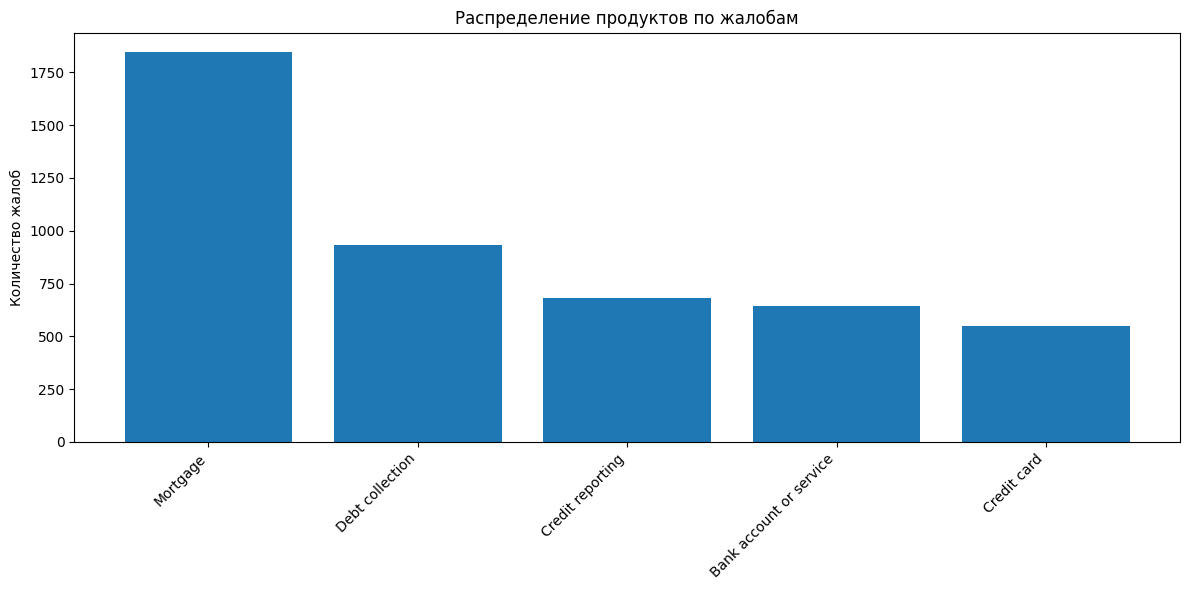


Распределение по продуктам:
product
Mortgage                   1846
Debt collection             931
Credit reporting            683
Bank account or service     646
Credit card                 548
Name: count, dtype: int64


In [304]:
# Распределение целевой переменной (product)
plt.figure(figsize=(12, 6))
product_counts = filtered_df['product'].value_counts()
plt.bar(product_counts.index, product_counts.values)
plt.title('Распределение продуктов по жалобам')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество жалоб')
plt.tight_layout()
plt.show()

print("\nРаспределение по продуктам:")
print(product_counts)

In [305]:
filtered_df['consumer_complaint_narrative'].dtype

dtype('float64')

In [306]:
filtered_df.isna().sum()

,0
date_received,0
product,0
sub_product,1231
issue,0
sub_issue,3040
consumer_complaint_narrative,4654
company_public_response,4654
company,0
state,8
zipcode,8


### Очень много пропущенных значений в consumer_complaint_narrative. Будем использовать для определения продукта issue

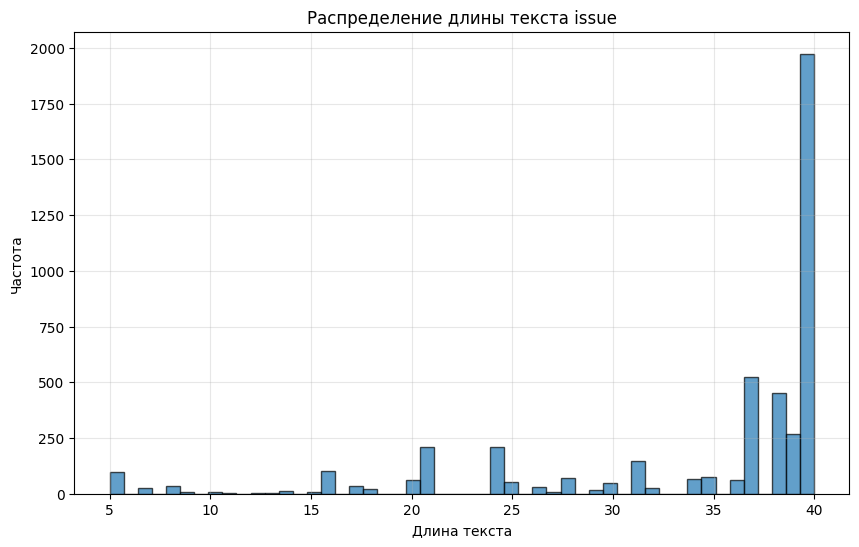

In [308]:
# Длина текста issue
filtered_df['issue_length'] = filtered_df['issue_clean'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['issue_length'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение длины текста issue')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()

In [309]:
print(f"\nСтатистика длины issue:")
print(f"Средняя длина: {filtered_df['issue_length'].mean():.2f} символов")
print(f"Медианная длина: {filtered_df['issue_length'].median():.2f} символов")
print(f"Стандартное отклонение: {filtered_df['issue_length'].std():.2f} символов")


Статистика длины issue:
Средняя длина: 34.23 символов
Медианная длина: 38.00 символов
Стандартное отклонение: 8.81 символов


# Пропущенные значения:

In [310]:
filtered_df.isna().sum()

,0
date_received,0
product,0
sub_product,1231
issue,0
sub_issue,3040
consumer_complaint_narrative,4654
company_public_response,4654
company,0
state,8
zipcode,8


In [316]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(filtered_df[['sub_product', 'sub_issue', 'state', 'zipcode', 'tags']])

SimpleImputer(strategy='most_frequent')

In [317]:
filtered_df[['sub_product', 'sub_issue', 'state', 'zipcode', 'tags']] = imp_cat.transform(filtered_df[['sub_product', 'sub_issue', 'state', 'zipcode', 'tags',]])

In [318]:
filtered_df.isna().sum()

,0
date_received,0
product,0
sub_product,0
issue,0
sub_issue,0
consumer_complaint_narrative,4654
company_public_response,4654
company,0
state,0
zipcode,0


Остальное текст

# Бинаризация:

In [319]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(filtered_df[['state','company','submitted_via', 'timely_response']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [320]:
dummies = pd.DataFrame(enc.transform(filtered_df[['state','company','submitted_via', 'timely_response']]),
                       columns=enc.get_feature_names_out(), index=filtered_df.index)
dummies.head()

,state_AE,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,...,"company_Worldwide Processing Group, LLC",company_Zions Bancorporation,company_Zwicker & Associates,submitted_via_Email,submitted_via_Fax,submitted_via_Phone,submitted_via_Postal mail,submitted_via_Referral,submitted_via_Web,timely_response_Yes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [321]:
filtered_df = pd.concat((filtered_df, dummies), axis=1).drop(['state','company','submitted_via', 'timely_response'], axis=1)

In [322]:
filtered_df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,zipcode,tags,consumer_consent_provided,...,"company_Worldwide Processing Group, LLC",company_Zions Bancorporation,company_Zwicker & Associates,submitted_via_Email,submitted_via_Fax,submitted_via_Phone,submitted_via_Postal mail,submitted_via_Referral,submitted_via_Web,timely_response_Yes
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Debt is not mine,NaN,NaN,95993,Older American,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Debt is not mine,NaN,NaN,91104,Older American,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,08/30/2013,Credit reporting,Other mortgage,Incorrect information on credit report,Account status,NaN,NaN,11764,Older American,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,30106,Older American,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,08/30/2013,Credit card,Other mortgage,Application processing delay,Debt is not mine,NaN,NaN,12206,Older American,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [323]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import joblib

# Загрузка необходимых ресурсов NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Инициализация лемматизатора и стоп-слов
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Функция для предобработки текста:
    - приведение к нижнему регистру
    - удаление специальных символов и цифр
    - лемматизация
    - удаление стоп-слов
    """
    if isinstance(text, str):
        # Приведение к нижнему регистру
        text = text.lower()

        # Удаление специальных символов и цифр
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Токенизация и лемматизация
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

        return ' '.join(words)
    return ''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [324]:
filtered_df['issue_clean_processed'] = filtered_df['issue_clean'].apply(preprocess_text)

In [325]:
label_encoder = LabelEncoder()
filtered_df['product_encoded'] = label_encoder.fit_transform(filtered_df['product'])

print("Классы продуктов:")
for i, product in enumerate(label_encoder.classes_):
    print(f"  {i}: {product}")

Классы продуктов:
  0: Bank account or service
  1: Credit card
  2: Credit reporting
  3: Debt collection
  4: Mortgage


# Разделение данных на обучающую и тестовую выборки

In [327]:
X = filtered_df['issue_clean_processed']
y = filtered_df['product_encoded']


In [328]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nРазмер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")


Размер обучающей выборки: 3490
Размер тестовой выборки: 1164


In [345]:
# Создаем TF-IDF векторайзер
tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.9
)

# Преобразуем тексты в TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Размерность TF-IDF матрицы обучающей выборки: {X_train_tfidf.shape}")
print(f"Размерность TF-IDF матрицы тестовой выборки: {X_test_tfidf.shape}")

Размерность TF-IDF матрицы обучающей выборки: (3490, 196)
Размерность TF-IDF матрицы тестовой выборки: (1164, 196)


# Random Forest:

In [344]:
print("\nRANDOM FOREST КЛАССИФИКАЦИЯ\n")

# Создаем и обучаем Random Forest
rf = ensemble.RandomForestClassifier(
    n_estimators=1000,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

print("Обучение Random Forest...")
rf.fit(X_train_tfidf, y_train)

# Предсказания
y_train_pred = rf.predict(X_train_tfidf)
y_test_pred = rf.predict(X_test_tfidf)

# Ошибки классификации
err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print(f"\nОшибка на обучающей выборке: {err_train:.4f}")
print(f"Ошибка на тестовой выборке: {err_test:.4f}")
print(f"Точность на обучающей выборке: {1 - err_train:.4f}")
print(f"Точность на тестовой выборке: {1 - err_test:.4f}")


RANDOM FOREST КЛАССИФИКАЦИЯ

Обучение Random Forest...

Ошибка на обучающей выборке: 0.0387
Ошибка на тестовой выборке: 0.0421
Точность на обучающей выборке: 0.9613
Точность на тестовой выборке: 0.9579



ДЕТАЛЬНАЯ ОЦЕНКА КАЧЕСТВА


Отчет по классификации (тестовая выборка):
                         precision    recall  f1-score   support

Bank account or service       1.00      0.87      0.93       161
            Credit card       0.74      1.00      0.85       137
       Credit reporting       1.00      1.00      1.00       171
        Debt collection       1.00      0.91      0.96       233
               Mortgage       1.00      0.98      0.99       462

               accuracy                           0.96      1164
              macro avg       0.95      0.95      0.94      1164
           weighted avg       0.97      0.96      0.96      1164



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Bank account or service'),
  Text(0, 1.5, 'Credit card'),
  Text(0, 2.5, 'Credit reporting'),
  Text(0, 3.5, 'Debt collection'),
  Text(0, 4.5, 'Mortgage')])

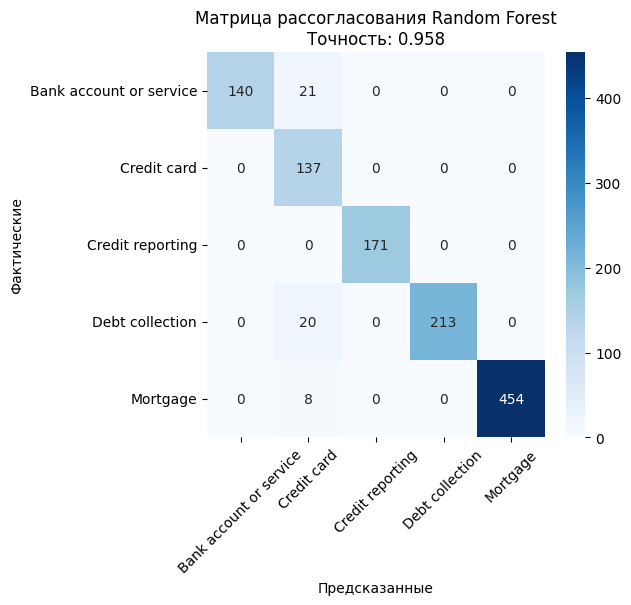

In [343]:
print("\nДЕТАЛЬНАЯ ОЦЕНКА КАЧЕСТВА\n")

print("\nОтчет по классификации (тестовая выборка):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Матрица рассогласования
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 5))

# Матрица рассогласования
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Матрица рассогласования Random Forest\nТочность: {1-err_test:.3f}')
plt.xlabel('Предсказанные')
plt.ylabel('Фактические')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

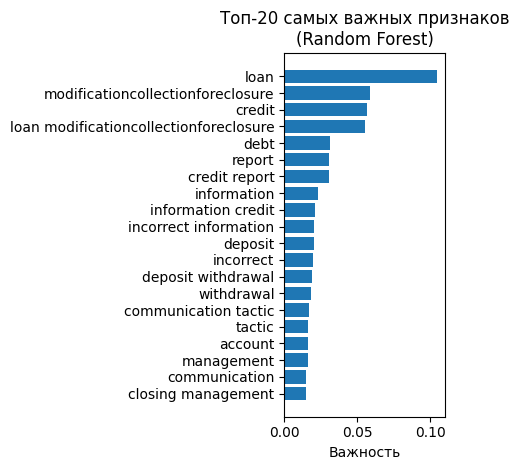

In [332]:
# Важность признаков
plt.subplot(1, 2, 2)
feature_names = tfidf.get_feature_names_out()
importances = rf.feature_importances_

# Топ-20 самых важных признаков
top_indices = np.argsort(importances)[-20:]
top_features = [feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

plt.barh(range(len(top_features)), top_importances)
plt.yticks(range(len(top_features)), top_features)
plt.title('Топ-20 самых важных признаков\n(Random Forest)')
plt.xlabel('Важность')

plt.tight_layout()
plt.show()

In [336]:
# Функция для предсказания нового текста
def predict_product_rf(text, rf_model, tfidf_vectorizer, label_encoder):
    processed_text = preprocess_text(text)
    text_tfidf = tfidf_vectorizer.transform([processed_text])

    prediction = rf_model.predict(text_tfidf)
    probability = rf_model.predict_proba(text_tfidf)

    predicted_product = label_encoder.inverse_transform(prediction)[0]
    confidence = np.max(probability[0])

    print(f"Текст: '{text}'")
    print(f"Предсказанный продукт: {predicted_product}")
    print(f"Уверенность: {confidence:.3f}")
    print("\nВероятности по всем классам:")
    for i, product in enumerate(label_encoder.classes_):
        print(f"  {product}: {probability[0][i]:.3f}")

    return predicted_product, confidence

### Примеры предсказаний

In [340]:
print("ПРИМЕРЫ ПРЕДСКАЗАНИЙ RANDOM FOREST\n")

test_texts = [
    "loan modification foreclosure",
    "incorrect information credit report",
    "debt collection attempts",
    "billing disputes credit card",
    "account opening management",
    "mortgage payment escrow"
]

for text in test_texts:
    predict_product_rf(text, rf, tfidf, label_encoder)
    print("-" * 50)

ПРИМЕРЫ ПРЕДСКАЗАНИЙ RANDOM FOREST

Текст: 'loan modification foreclosure'
Предсказанный продукт: Mortgage
Уверенность: 0.482

Вероятности по всем классам:
  Bank account or service: 0.098
  Credit card: 0.251
  Credit reporting: 0.032
  Debt collection: 0.137
  Mortgage: 0.482
--------------------------------------------------
Текст: 'incorrect information credit report'
Предсказанный продукт: Credit reporting
Уверенность: 0.994

Вероятности по всем классам:
  Bank account or service: 0.001
  Credit card: 0.003
  Credit reporting: 0.994
  Debt collection: 0.001
  Mortgage: 0.001
--------------------------------------------------
Текст: 'debt collection attempts'
Предсказанный продукт: Debt collection
Уверенность: 0.513

Вероятности по всем классам:
  Bank account or service: 0.097
  Credit card: 0.254
  Credit reporting: 0.032
  Debt collection: 0.513
  Mortgage: 0.103
--------------------------------------------------
Текст: 'billing disputes credit card'
Предсказанный продукт: Credi

### Сравнение с разным количеством деревьев:

ВЛИЯНИЕ КОЛИЧЕСТВА ДЕРЕВЬЕВ НА ТОЧНОСТЬ
Корректное сравнение (все параметры одинаковы):
n_estimators=   1: Train error=0.1126, Test error=0.1160, Accuracy=0.8840
n_estimators=   3: Train error=0.0418, Test error=0.0455, Accuracy=0.9545
n_estimators=   5: Train error=0.0272, Test error=0.0309, Accuracy=0.9691
n_estimators=   7: Train error=0.0135, Test error=0.0146, Accuracy=0.9854
n_estimators=  10: Train error=0.0335, Test error=0.0326, Accuracy=0.9674
n_estimators=  20: Train error=0.0401, Test error=0.0412, Accuracy=0.9588
n_estimators= 100: Train error=0.0387, Test error=0.0421, Accuracy=0.9579
n_estimators= 200: Train error=0.0387, Test error=0.0421, Accuracy=0.9579
n_estimators= 500: Train error=0.0387, Test error=0.0421, Accuracy=0.9579


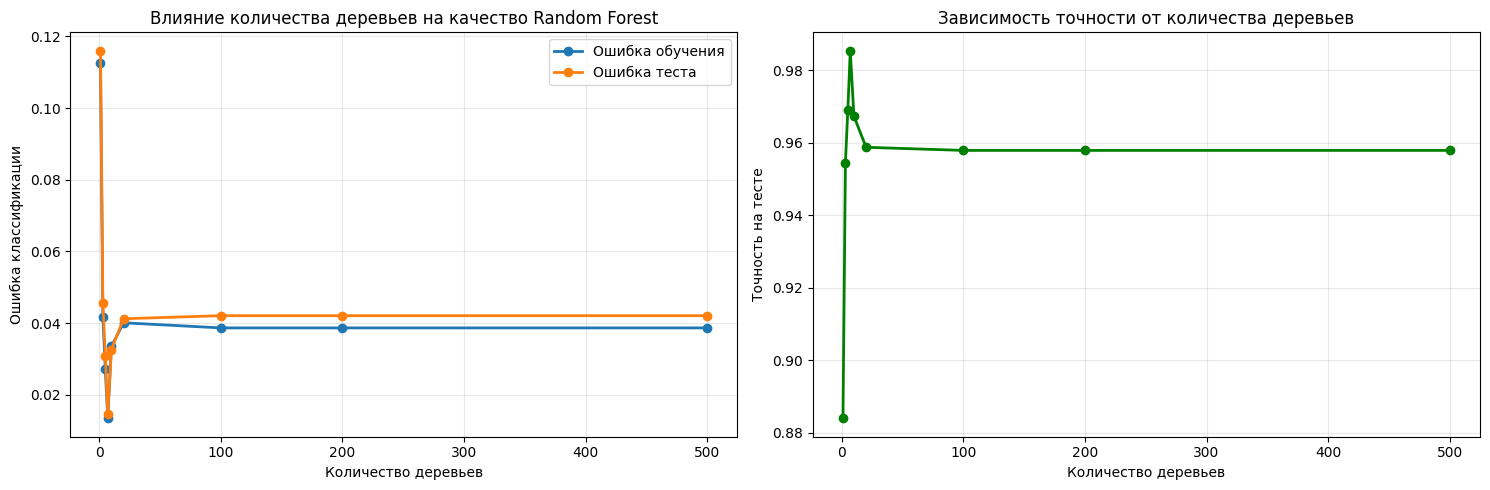


ЛУЧШИЙ РЕЗУЛЬТАТ: n_estimators=7, Accuracy=0.9854


In [338]:
print("ВЛИЯНИЕ КОЛИЧЕСТВА ДЕРЕВЬЕВ НА ТОЧНОСТЬ")

# ФИКСИРУЕМ ВСЕ ПАРАМЕТРЫ кроме n_estimators
base_params = {
    'random_state': 42,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt'
}

n_estimators_list = [1, 3, 5, 7, 10, 20, 100, 200, 500]
train_errors = []
test_errors = []
accuracies = []

print("Корректное сравнение (все параметры одинаковы):")
for n_est in n_estimators_list:
    rf_temp = ensemble.RandomForestClassifier(
        n_estimators=n_est,
        **base_params
    )
    rf_temp.fit(X_train_tfidf, y_train)

    # Предсказания
    y_train_pred_temp = rf_temp.predict(X_train_tfidf)
    y_test_pred_temp = rf_temp.predict(X_test_tfidf)

    # Ошибки
    train_error = np.mean(y_train != y_train_pred_temp)
    test_error = np.mean(y_test != y_test_pred_temp)
    test_accuracy = accuracy_score(y_test, y_test_pred_temp)

    train_errors.append(train_error)
    test_errors.append(test_error)
    accuracies.append(test_accuracy)

    print(f"n_estimators={n_est:4d}: Train error={train_error:.4f}, Test error={test_error:.4f}, Accuracy={test_accuracy:.4f}")

# График влияния количества деревьев
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_list, train_errors, 'o-', label='Ошибка обучения', linewidth=2)
plt.plot(n_estimators_list, test_errors, 'o-', label='Ошибка теста', linewidth=2)
plt.xlabel('Количество деревьев')
plt.ylabel('Ошибка классификации')
plt.title('Влияние количества деревьев на качество Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_list, accuracies, 'o-', color='green', linewidth=2)
plt.xlabel('Количество деревьев')
plt.ylabel('Точность на тесте')
plt.title('Зависимость точности от количества деревьев')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ результатов
best_idx = np.argmax(accuracies)
best_n = n_estimators_list[best_idx]
best_accuracy = accuracies[best_idx]

print(f"\nЛУЧШИЙ РЕЗУЛЬТАТ: n_estimators={best_n}, Accuracy={best_accuracy:.4f}")

Мы видим нелинейную зависимость точности. Три фазы поведения:
1) Фаза роста: 1 → 7 деревьев: постепенное улучшение
2) Пик качества': 7 деревьев: оптимум (98.54%)
3) Фаза стабилизации: 10+ деревьев: плато на уровне ~96%

Для задачи классификации финансовых продуктов по тексту проблемы оптимальной является конфигурация Random Forest с 7 деревьями, обеспечивающая точность 98.54%